      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

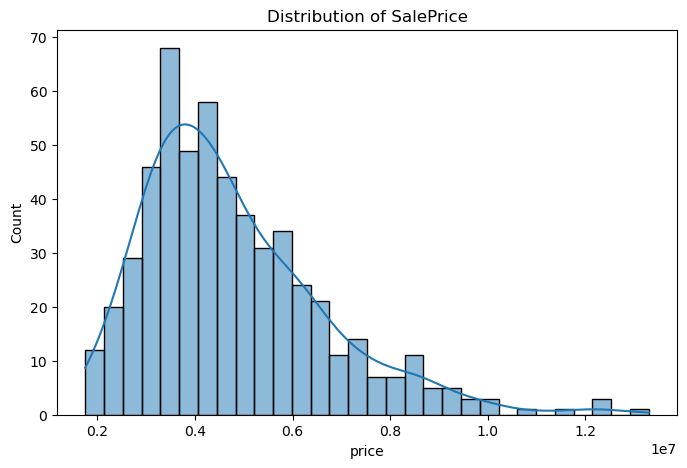

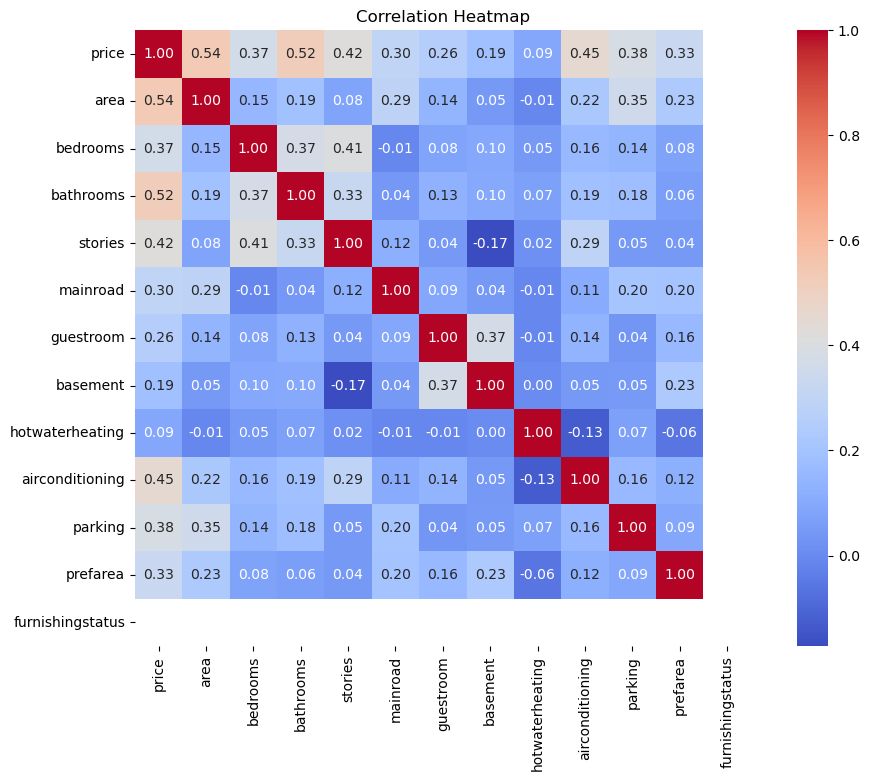

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("C:/Users/User/Desktop/Python/Ivoyant Projects/Predicting House Prices/Housing.csv") 

# Quick overview of the data
print(data.head())
print(data.info())
print(data.describe())

# Convert categorical columns to binary values (yes = 1, no = 0)
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Visualize target variable (price)
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Preprocess the data
# Select features
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'
X = data[features]
y = data[target]

# Handle missing values (using SimpleImputer)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape y for imputation

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor Model
rf_model = RandomForestRegressor